In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time
import warnings
warnings.filterwarnings('ignore')
import json

from wordcloud import WordCloud
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import r2_score


## 1. DATA

In [2]:
datas = ['BR', 'CA', 'DE', 'FR', 'GB', 'IN', 'KR', 'US']

dfs = []
for csv in datas:
    
    df = pd.read_csv(f'/Users/gihyunyeo/Documents/데이터사이언티스트/ML/ML_project/project_1/2020_youtube/{csv}_youtube_trending_data.csv',
                        encoding = 'ISO-8859-1', index_col='video_id')
    df['country'] = csv
    dfs.append(df)



youtube_df = pd.concat(dfs)
youtube_df.head(3)

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
video_id,,,,,,,,,,,,,,,,
s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vÃ­deo me declarei pra ...",BR
jbGRowa5tIk,ITZY âNot Shyâ M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|ìì§|ITZY Video|I...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,BR
3EfkCrXKZNs,Oh Juliana PARÃDIA - MC Niack,2020-08-10T14:59:00Z,UCoXZmVma073v5G1cW82UKkA,As IrmÃ£s Mota,22,2020-08-12T00:00:00Z,OH JULIANA PARÃDIA|MC Niack PARÃDIA|PARÃDIA...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! ð¬ Quer nos mandar...,BR


In [3]:
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1014831 entries, s9FH4rDMvds to Yx3K3g4CtoQ
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   title              1014831 non-null  object
 1   publishedAt        1014831 non-null  object
 2   channelId          1014831 non-null  object
 3   channelTitle       1014830 non-null  object
 4   categoryId         1014831 non-null  int64 
 5   trending_date      1014831 non-null  object
 6   tags               1014831 non-null  object
 7   view_count         1014831 non-null  int64 
 8   likes              1014831 non-null  int64 
 9   dislikes           1014831 non-null  int64 
 10  comment_count      1014831 non-null  int64 
 11  thumbnail_link     1014831 non-null  object
 12  comments_disabled  1014831 non-null  bool  
 13  ratings_disabled   1014831 non-null  bool  
 14  description        978458 non-null   object
 15  country            1014831 non-null  obj

In [4]:
print(youtube_df.shape)

(1014831, 16)


In [5]:
youtube_df.isnull().sum()

title                    0
publishedAt              0
channelId                0
channelTitle             1
categoryId               0
trending_date            0
tags                     0
view_count               0
likes                    0
dislikes                 0
comment_count            0
thumbnail_link           0
comments_disabled        0
ratings_disabled         0
description          36373
country                  0
dtype: int64

In [7]:
youtube_df['channelTitle'] = youtube_df['channelTitle'].fillna("")
youtube_df.isnull().sum()

title                0
publishedAt          0
channelId            0
channelTitle         0
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
thumbnail_link       0
comments_disabled    0
ratings_disabled     0
description          0
country              0
dtype: int64

In [6]:
youtube_df['description'] = youtube_df['description'].fillna("")
youtube_df.isnull().sum()

title                0
publishedAt          0
channelId            0
channelTitle         1
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
thumbnail_link       0
comments_disabled    0
ratings_disabled     0
description          0
country              0
dtype: int64

In [8]:
# 영상제목과 채널명이 둘 다 중복인 영상 제거
youtube_data = youtube_df.drop_duplicates(['title','channelTitle'], keep='first')

youtube_data.head(3)

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
video_id,,,,,,,,,,,,,,,,
s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vÃ­deo me declarei pra ...",BR
jbGRowa5tIk,ITZY âNot Shyâ M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|ìì§|ITZY Video|I...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,BR
3EfkCrXKZNs,Oh Juliana PARÃDIA - MC Niack,2020-08-10T14:59:00Z,UCoXZmVma073v5G1cW82UKkA,As IrmÃ£s Mota,22,2020-08-12T00:00:00Z,OH JULIANA PARÃDIA|MC Niack PARÃDIA|PARÃDIA...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! ð¬ Quer nos mandar...,BR


In [9]:
print(youtube_data.isnull().values.any())

False


In [10]:
youtube = youtube_data.dropna(how='any',axis=0)

In [11]:
youtube.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,156081.000000,1.560810e+05,1.560810e+05,1.560810e+05,1.560810e+05
mean,19.928691,7.827784e+05,4.930949e+04,8.154354e+02,3.213527e+03
std,6.305458,2.129463e+06,1.398557e+05,1.121278e+04,2.081704e+04
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,1.279140e+05,5.870000e+03,1.900000e+01,3.060000e+02
50%,22.000000,3.064340e+05,1.493400e+04,1.440000e+02,8.190000e+02
75%,24.000000,7.649930e+05,4.143300e+04,5.160000e+02,2.227000e+03
max,29.000000,1.696265e+08,7.110651e+06,3.979409e+06,3.400697e+06


### - Insert category



In [12]:
youtube['categoryId'] = youtube['categoryId'].astype(str)


categoryId = {}

with open('/Users/gihyunyeo/Documents/데이터사이언티스트/ML/ML_project/project_1/2020_youtube/MX_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        categoryId[category['id']] = category['snippet']['title']

youtube.insert(4, 'category', youtube['categoryId'].map(categoryId))
category_list = youtube['category'].unique()
category_list

array(['People & Blogs', 'Music', 'Gaming', 'Comedy', 'Sports',
       'Entertainment', 'Education', 'Autos & Vehicles', 'Howto & Style',
       'News & Politics', 'Science & Technology', 'Film & Animation',
       'Travel & Events', 'Pets & Animals', nan], dtype=object)

False    154127
True       1954
Name: comments_disabled, dtype: int64


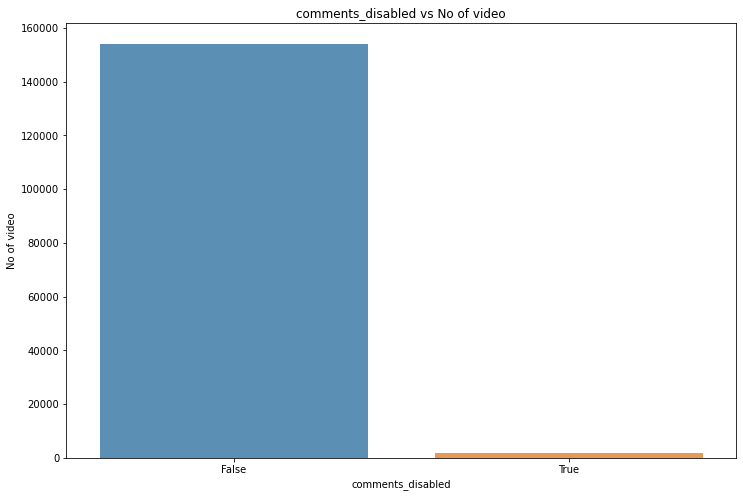

False    154729
True       1352
Name: ratings_disabled, dtype: int64


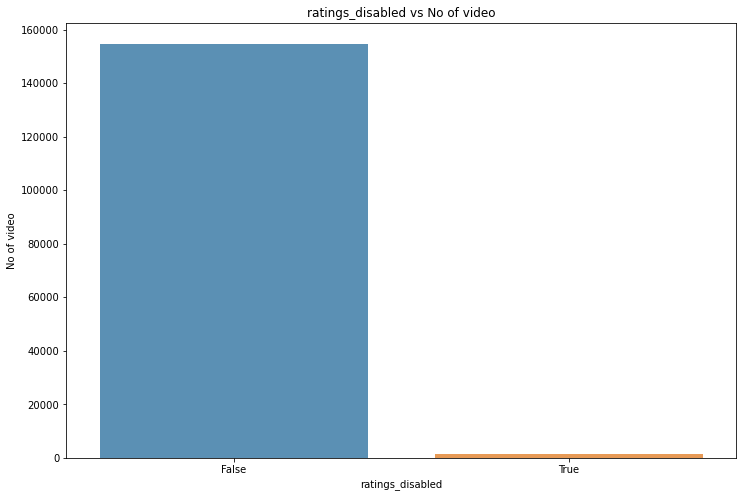

In [13]:
for x in (['comments_disabled','ratings_disabled']):
    count=youtube[x].value_counts()
    print(count)
    plt.figure(figsize=(12,8))
    sns.barplot(count.index, count.values, alpha=0.8)
    plt.title('{} vs No of video'.format(x))
    plt.ylabel('No of video')
    plt.xlabel('{}'.format(x))
    plt.show()

### - Graphs by Category

### 1). category 별 비디오 수

Entertainment           46814
Music                   20769
People & Blogs          18234
Sports                  18064
Gaming                  14854
Comedy                   9424
News & Politics          6196
Howto & Style            5308
Science & Technology     4297
Education                3686
Autos & Vehicles         3337
Film & Animation         3182
Travel & Events          1068
Pets & Animals            735
Name: category, dtype: int64


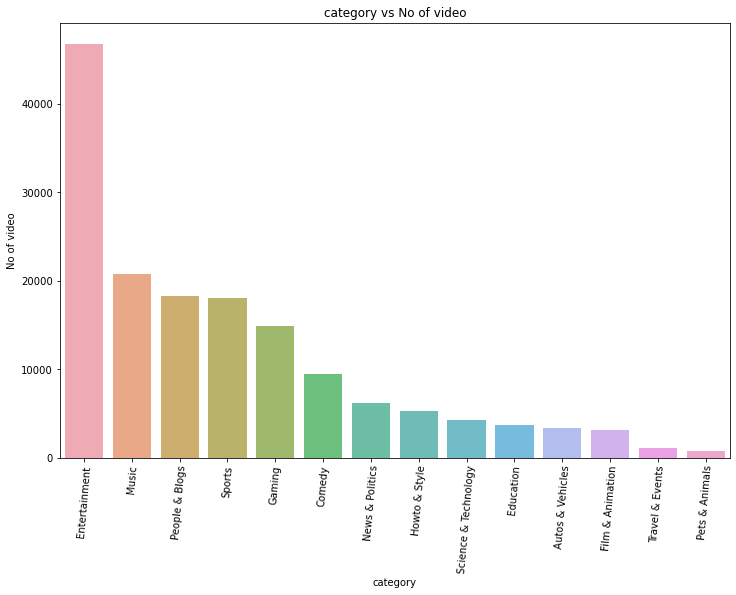

In [74]:
for x in ['category']:
    count=youtube[x].value_counts()
    print(count)
    plt.figure(figsize=(12,8))
    sns.barplot(count.index, count.values, alpha=0.8)
    plt.title('{} vs No of video'.format(x))
    plt.ylabel('No of video')
    plt.xlabel('{}'.format(x))
    plt.xticks(rotation=85)
    plt.show()

### 2). 국가별 카테고리 

Text(0, 0.5, 'views/category')

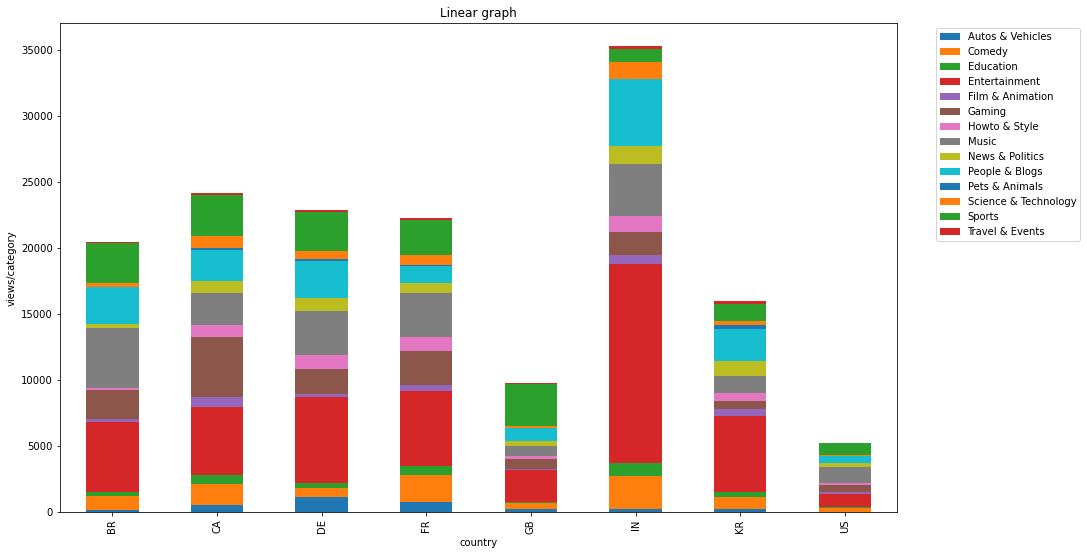

In [18]:
Figure2 = youtube.groupby('category')['country'].value_counts().unstack(0).plot.bar(stacked=True, figsize=(15,9))
#figure.legend(loc='upper left')
Figure2.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title("Linear graph")
plt.xlabel("country")
plt.ylabel("views/category")

### 3). 카테고리 별 국가

Text(0, 0.5, 'views')

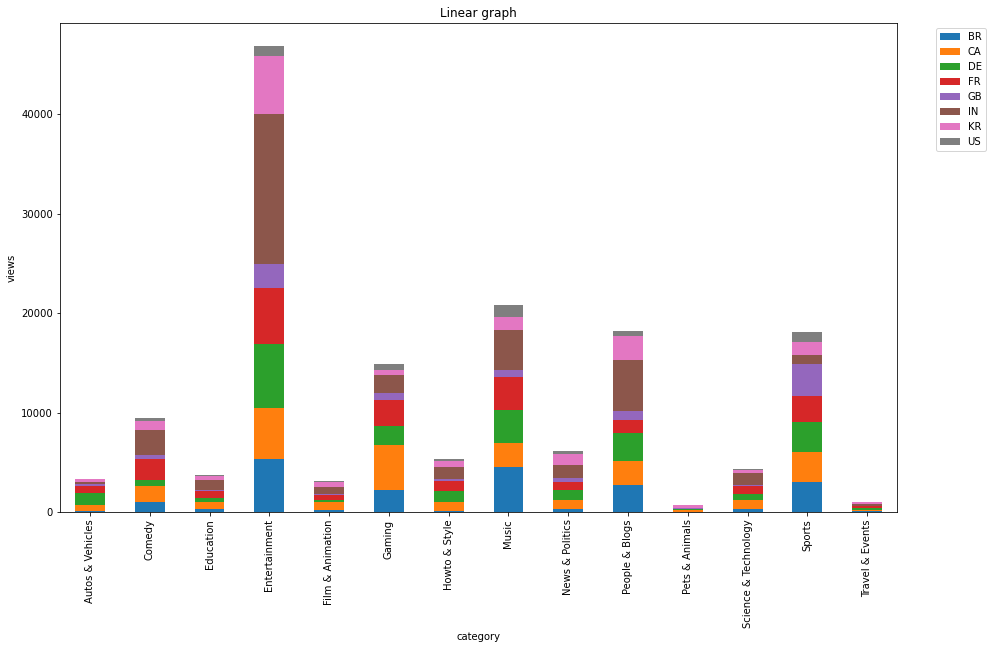

In [75]:
figure3 =youtube.groupby('category')['country'].value_counts().unstack(1).plot.bar(stacked=True, figsize=(15,9))
#figure.legend(loc='upper left')
figure3.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title("Linear graph")
plt.xlabel("category")
plt.ylabel("views")

### 4). category and views 상관관계

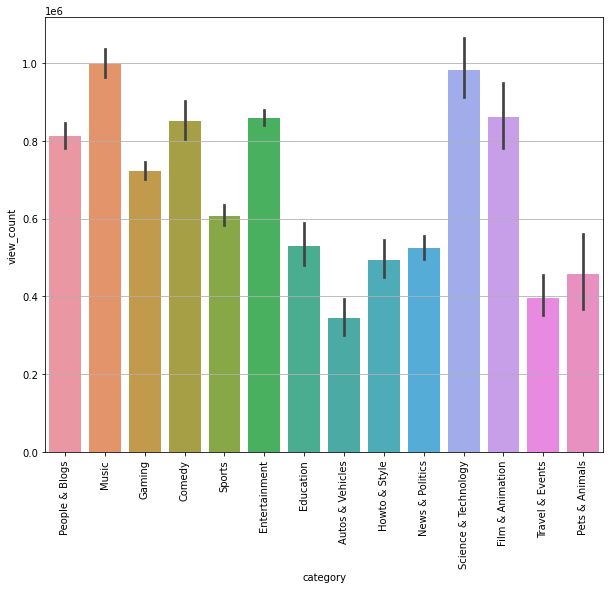

In [20]:
youtube['view_count']
plt.figure(figsize=(10, 8))
plt.grid()
sns.barplot(y = youtube['view_count'],x = youtube['category'])
plt.xlabel('category')
plt.ylabel('view_count')
plt.xticks(rotation=90)
plt.show()

### 5). category and likes 의 상관관계

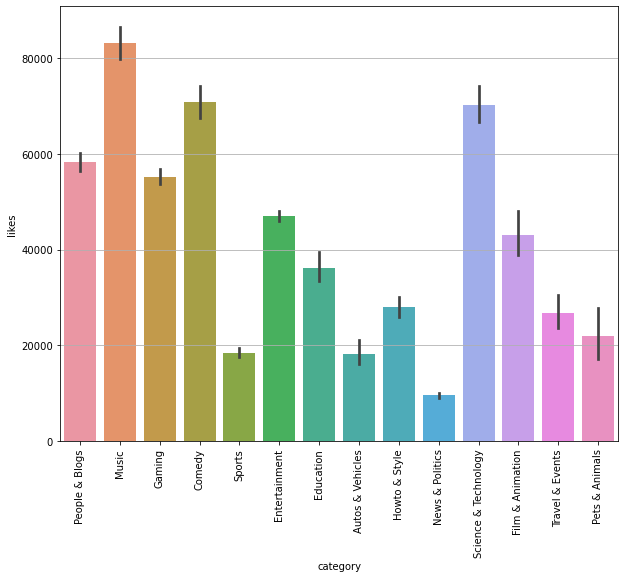

In [21]:
youtube['view_count']
plt.figure(figsize=(10, 8))
plt.grid()
sns.barplot(y = youtube['likes'],x = youtube['category'])
plt.xlabel('category')
plt.ylabel('likes')
plt.xticks(rotation=90)
plt.show()

### 6).category and dislike의 상관관계

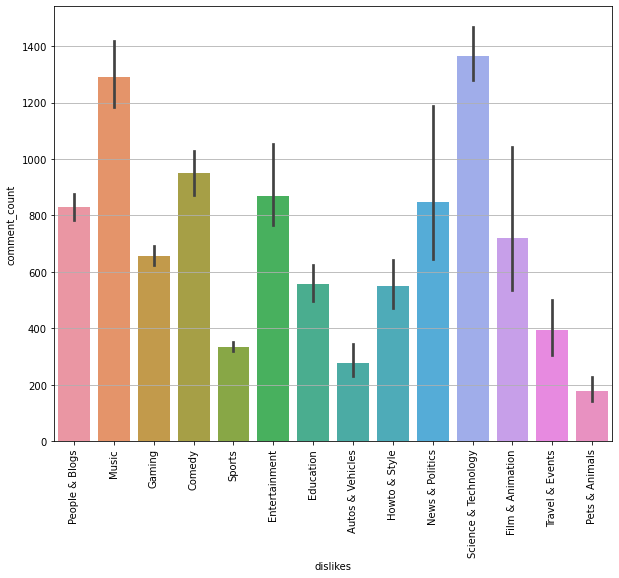

In [22]:
youtube['view_count']
plt.figure(figsize=(10, 8))
plt.grid()
sns.barplot(y = youtube['dislikes'],x = youtube['category'])
plt.xlabel('dislikes')
plt.ylabel('comment_count')
plt.xticks(rotation=90)
plt.show()

### 7). category and comment_count의 상관관계

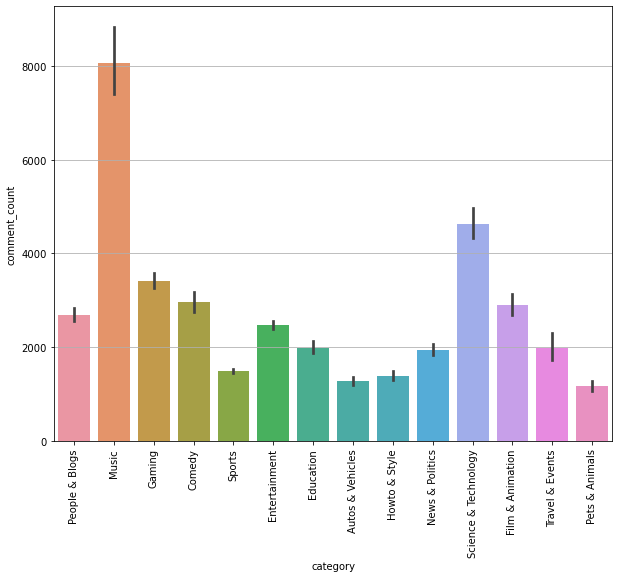

In [23]:
youtube['view_count']
plt.figure(figsize=(10, 8))
plt.grid()
sns.barplot(y = youtube['comment_count'],x = youtube['category'])
plt.xlabel('category')
plt.ylabel('comment_count')
plt.xticks(rotation=90)
plt.show()

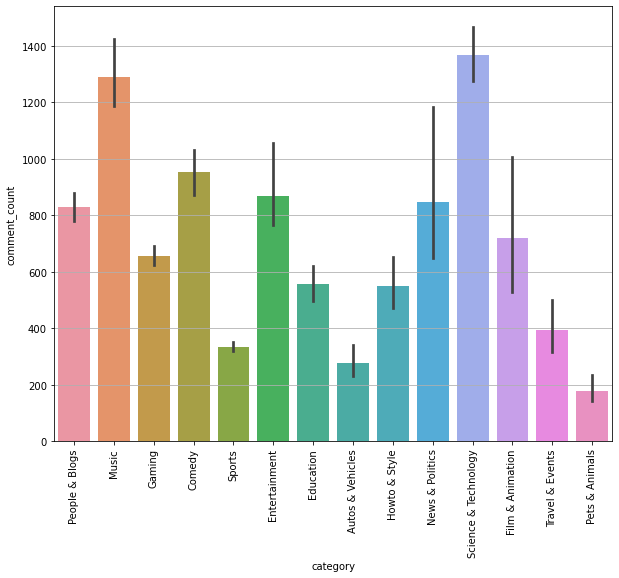

In [76]:
youtube['view_count']
plt.figure(figsize=(10, 8))
plt.grid()
sns.barplot(y = youtube['dislikes'],x = youtube['category'])
plt.xlabel('category')
plt.ylabel('comment_count')
plt.xticks(rotation=90)
plt.show()

## 2. heatmap

In [24]:
youtube.corr()

,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
view_count,1.000000,0.743623,0.186914,0.340579,-0.002731,-0.002109
likes,0.743623,1.000000,0.149668,0.573808,-0.023053,-0.032957
dislikes,0.186914,0.149668,1.000000,0.143653,0.003996,-0.006798
comment_count,0.340579,0.573808,0.143653,1.000000,-0.017382,-0.006384
comments_disabled,-0.002731,-0.023053,0.003996,-0.017382,1.000000,0.082750
ratings_disabled,-0.002109,-0.032957,-0.006798,-0.006384,0.082750,1.000000


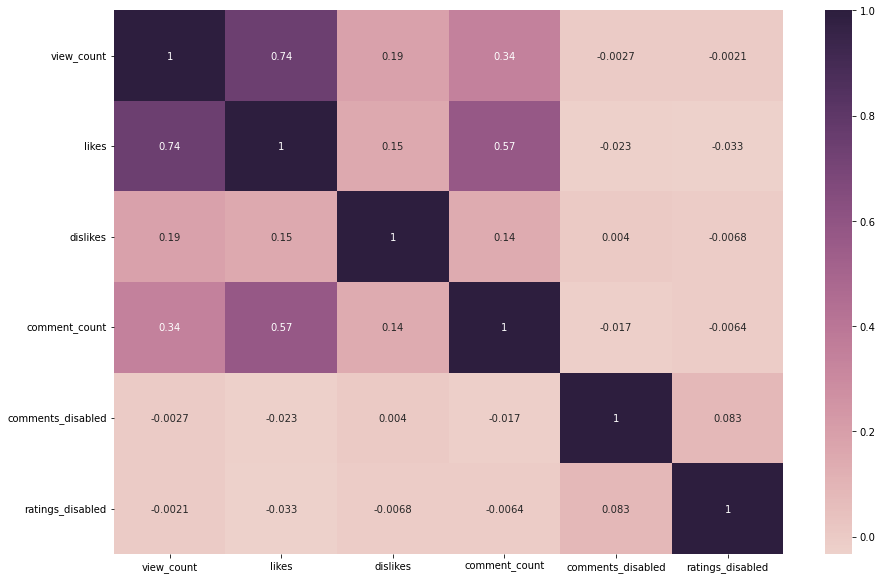

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(youtube.corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True)
plt.show()

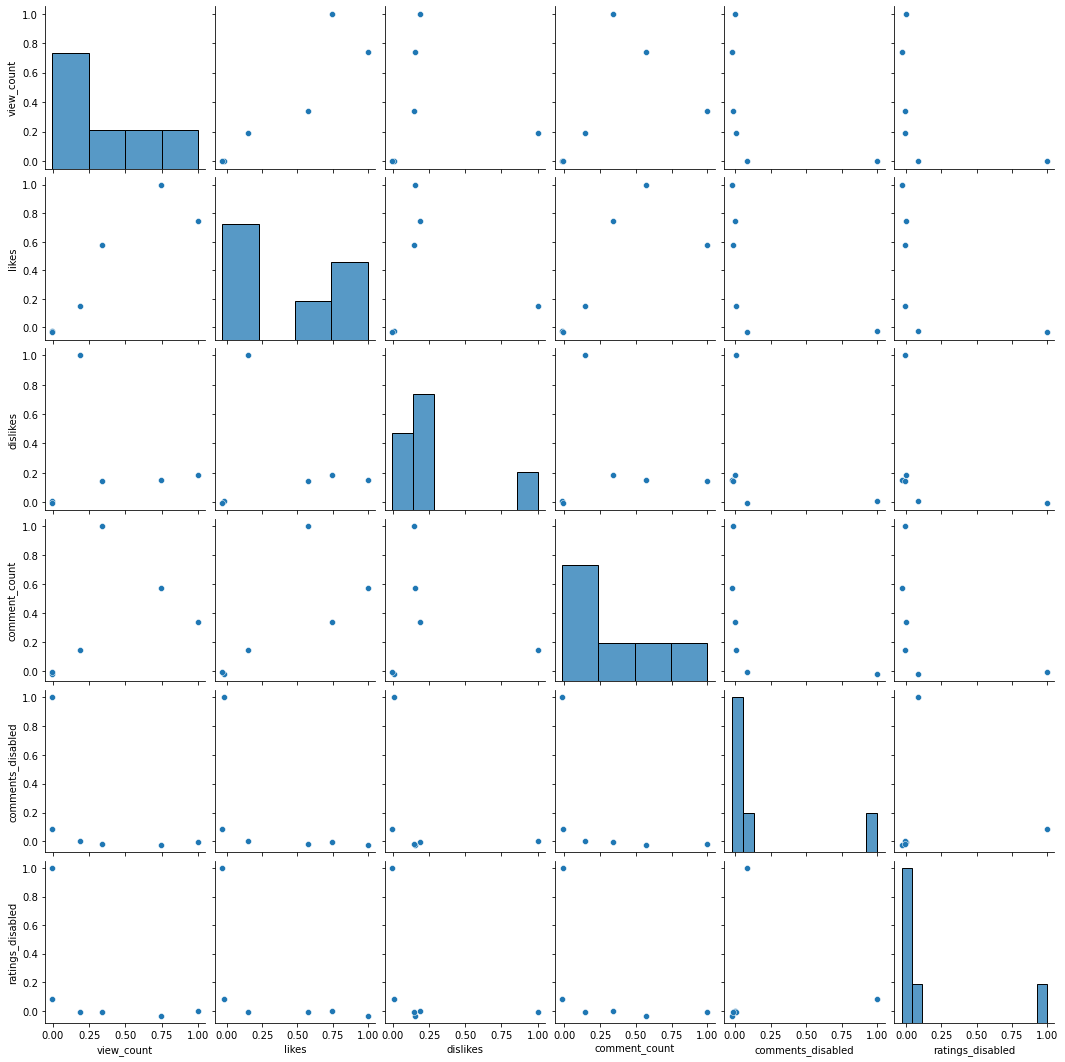

In [26]:
sns.pairplot(youtube.corr())
plt.show()

## 3. DATASET

In [27]:
youtube['year'] = youtube['trending_date'].apply(lambda x : '20'+ x[:2])
youtube['year']

video_id
s9FH4rDMvds    2020
jbGRowa5tIk    2020
3EfkCrXKZNs    2020
gBjox7vn3-g    2020
npoUGx7UW7o    2020
               ... 
WSd2YXfe2OU    2020
UtQ9JggPoBM    2020
kYdLFvCjZ84    2020
16DpSNffVDM    2020
uZA9c86l0ZQ    2020
Name: year, Length: 156081, dtype: object

In [28]:
my_dict=(youtube['year'].value_counts()).to_dict()
my_dict

{'2020': 156081}

In [29]:
youtube['year'].value_counts()

2020    156081
Name: year, dtype: int64

### - Dataset collection week

In [30]:
youtube['publishedAt'] = pd.to_datetime(youtube['publishedAt'].apply(lambda x: x[:19]))
youtube.head(3)

,title,publishedAt,channelId,channelTitle,category,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,year
video_id,,,,,,,,,,,,,,,,,,
s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11 22:21:49,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,People & Blogs,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vÃ­deo me declarei pra ...",BR,2020
jbGRowa5tIk,ITZY âNot Shyâ M/V TEASER,2020-08-11 15:00:13,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,Music,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|ìì§|ITZY Video|I...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,BR,2020
3EfkCrXKZNs,Oh Juliana PARÃDIA - MC Niack,2020-08-10 14:59:00,UCoXZmVma073v5G1cW82UKkA,As IrmÃ£s Mota,People & Blogs,22,2020-08-12T00:00:00Z,OH JULIANA PARÃDIA|MC Niack PARÃDIA|PARÃDIA...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! ð¬ Quer nos mandar...,BR,2020


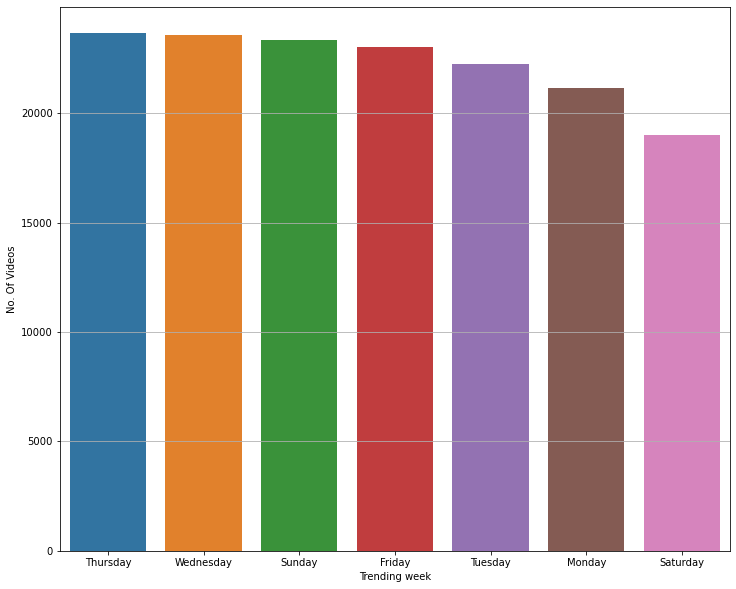

In [31]:
week = youtube['publishedAt'].dt.day_name()
my_dict = week.value_counts().to_dict()

count = pd.DataFrame(list(my_dict.items()),columns= ['Trending week','No. Of Videos'])

fig = plt.figure(figsize=(12,10))

plt.grid()
sns.barplot(x='Trending week', y='No. Of Videos', data=count);

### - Dataset collection hour

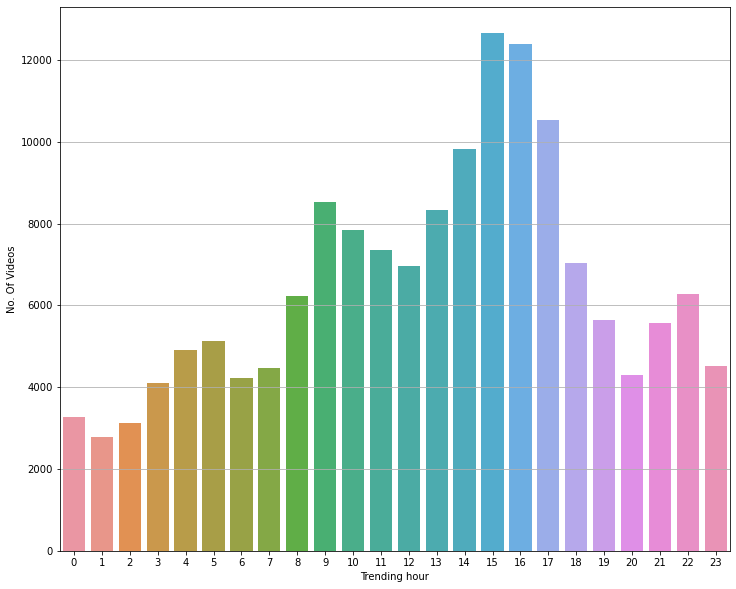

In [32]:
hour = youtube['publishedAt'].dt.hour
my_dict = hour.value_counts().to_dict()

count = pd.DataFrame(list(my_dict.items()),columns= ['Trending hour','No. Of Videos'])

fig = plt.figure(figsize=(12,10))

plt.grid()
sns.barplot(x='Trending hour', y='No. Of Videos', data=count);

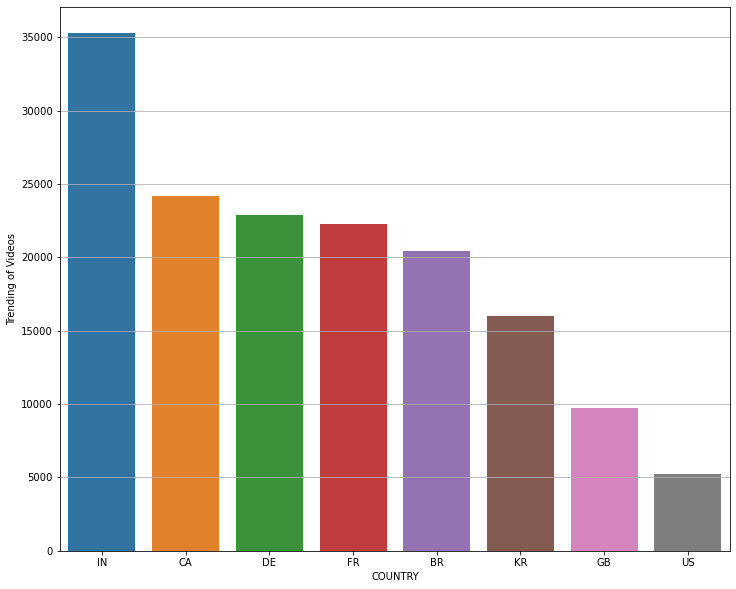

In [33]:
my_dict = youtube['country'].value_counts().to_dict()

count = pd.DataFrame(list(my_dict.items()), columns=['COUNTRY', 'Trending of Videos'])

plt.figure(figsize=(12,10))
plt.grid()
sns.barplot(x= 'COUNTRY', y="Trending of Videos", data=count);

In [34]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156081 entries, s9FH4rDMvds to uZA9c86l0ZQ
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   title              156081 non-null  object        
 1   publishedAt        156081 non-null  datetime64[ns]
 2   channelId          156081 non-null  object        
 3   channelTitle       156081 non-null  object        
 4   category           155968 non-null  object        
 5   categoryId         156081 non-null  object        
 6   trending_date      156081 non-null  object        
 7   tags               156081 non-null  object        
 8   view_count         156081 non-null  int64         
 9   likes              156081 non-null  int64         
 10  dislikes           156081 non-null  int64         
 11  comment_count      156081 non-null  int64         
 12  thumbnail_link     156081 non-null  object        
 13  comments_disabled  156081 non-null

## 4. Tags

In [43]:
tag_df = youtube.sample(frac=0.25)

In [44]:
words_tag = ' '.join((job for job in tag_df.tags.dropna().str.replace(';', ' ').str.replace(',', ' ')))

In [47]:
from collections import Counter
from konlpy.tag import Okt

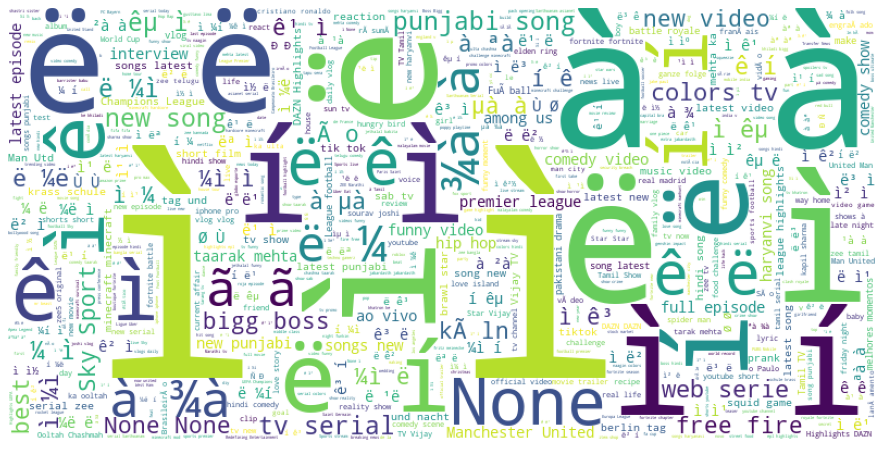

In [48]:
wc_tag = WordCloud( width=800, height=400,max_words=1000, background_color='white').generate(words_tag)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc_tag);

### - capitalized word

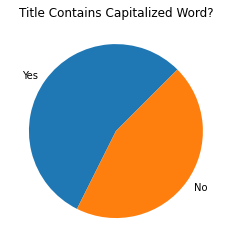

In [37]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False

plt.figure(facecolor='w')
youtube["contains_capitalized"] = youtube["title"].apply(contains_capitalized_word)
value_counts = youtube["contains_capitalized"].value_counts().to_dict()
plt.pie([ value_counts[True], value_counts[False]], labels=['Yes', 'No'],startangle=45)
plt.title('Title Contains Capitalized Word?')

plt.show()

### 1). tag_count 와 like 의 상관관계

In [38]:
tags=[x.count("|")+1 for x in youtube["tags"]]
youtube["tag_count"]=tags

In [39]:
youtube.head(3)

,title,publishedAt,channelId,channelTitle,category,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,year,contains_capitalized,tag_count
video_id,,,,,,,,,,,,,,,,,,,,
s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11 22:21:49,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,People & Blogs,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vÃ­deo me declarei pra ...",BR,2020,True,14
jbGRowa5tIk,ITZY âNot Shyâ M/V TEASER,2020-08-11 15:00:13,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,Music,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|ìì§|ITZY Video|I...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,BR,2020,True,47
3EfkCrXKZNs,Oh Juliana PARÃDIA - MC Niack,2020-08-10 14:59:00,UCoXZmVma073v5G1cW82UKkA,As IrmÃ£s Mota,People & Blogs,22,2020-08-12T00:00:00Z,OH JULIANA PARÃDIA|MC Niack PARÃDIA|PARÃDIA...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! ð¬ Quer nos mandar...,BR,2020,True,7


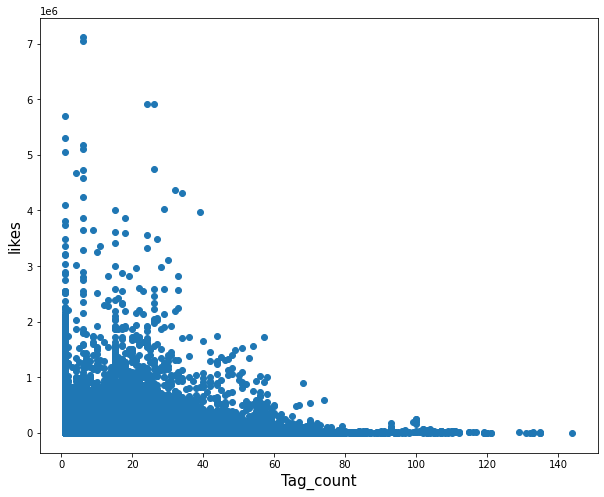

In [40]:
plt.figure(figsize=(10,8))
plt.scatter(youtube['tag_count'],youtube['likes'])
plt.xlabel("Tag_count",size=15)
plt.ylabel("likes",size=15)
plt.show()

### 2). tag_count와 dislike 의 상관관계

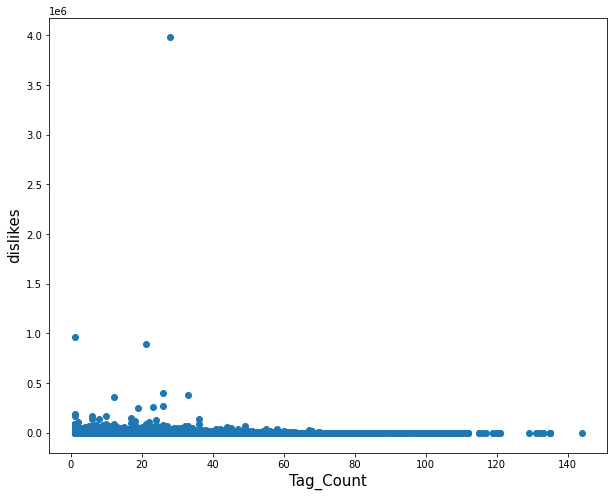

In [42]:
plt.figure(figsize=(10,8))
plt.scatter(youtube['tag_count'],youtube['dislikes'])
plt.xlabel("Tag_Count",size=15)
plt.ylabel("dislikes",size=15)
plt.show()

### 3). tag_count와 comment_count 와의 상관관계

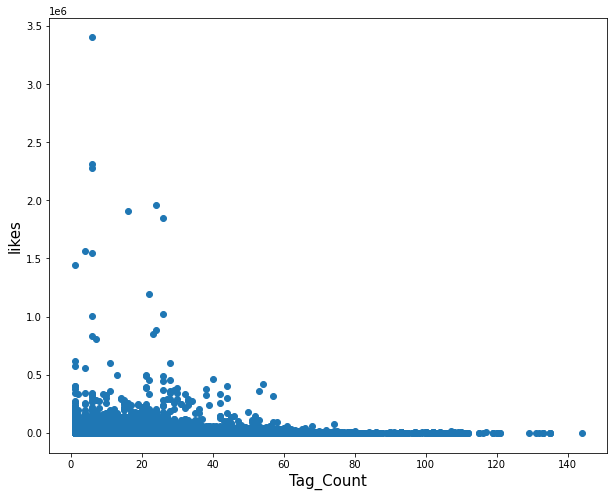

In [43]:
plt.figure(figsize=(10,8))
plt.scatter(youtube['tag_count'],youtube['comment_count'])
plt.xlabel("Tag_Count",size=15)
plt.ylabel("likes",size=15)
plt.show()

### 4). tag_count와 views의 상관관계

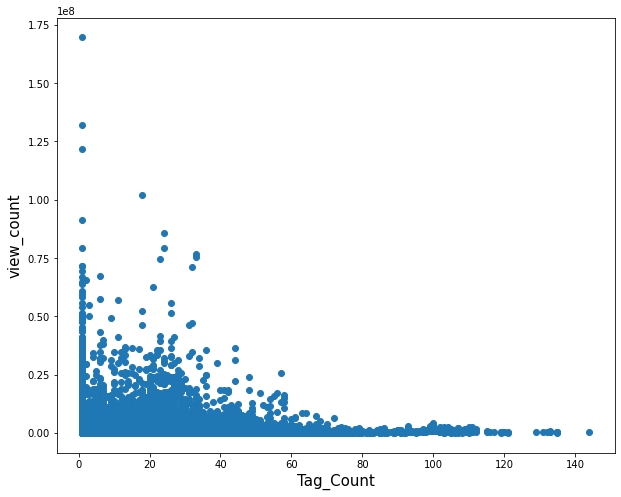

In [44]:
plt.figure(figsize=(10,8))
plt.scatter(youtube['tag_count'],youtube['view_count'])
plt.xlabel("Tag_Count",size=15)
plt.ylabel("view_count",size=15)
plt.show()

## 5. Views, likes, dislikes, comment_count 

### - HEATMAP

In [80]:
corr_columns = ["view_count", "likes", "dislikes", "comment_count", "tag_count"]
youtube[corr_columns] = youtube[corr_columns].astype(int)
corr_matrix = youtube[corr_columns].corr()
corr_matrix

,view_count,likes,dislikes,comment_count,tag_count
view_count,1.000000,0.743623,0.186914,0.340579,-0.019703
likes,0.743623,1.000000,0.149668,0.573808,-0.042050
dislikes,0.186914,0.149668,1.000000,0.143653,-0.002062
comment_count,0.340579,0.573808,0.143653,1.000000,0.002929
tag_count,-0.019703,-0.042050,-0.002062,0.002929,1.000000


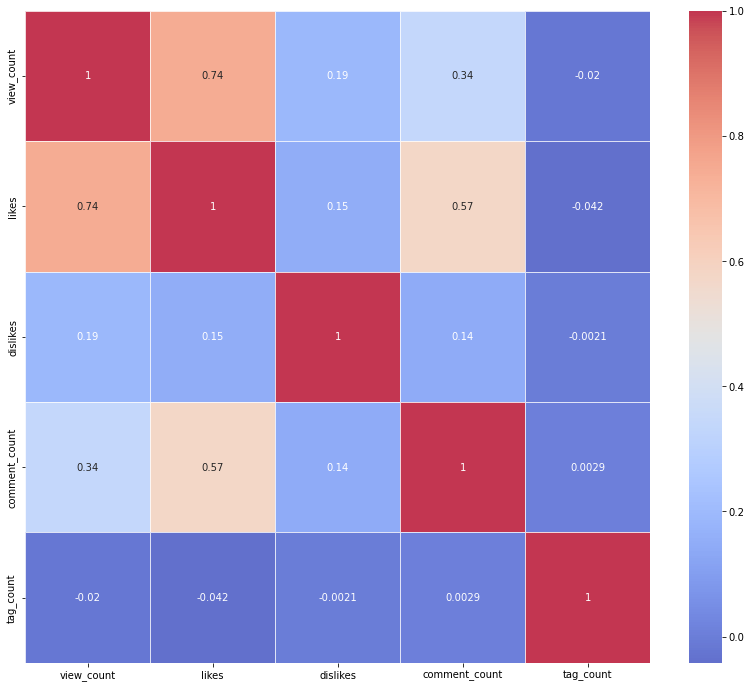

In [81]:
plt.figure(figsize =(14 ,12))
heatmap_YT =sns.heatmap(corr_matrix, linewidths=.5, annot= True, cmap = 'coolwarm', alpha=0.8)
#ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')

### 1). views and likes 상관관계

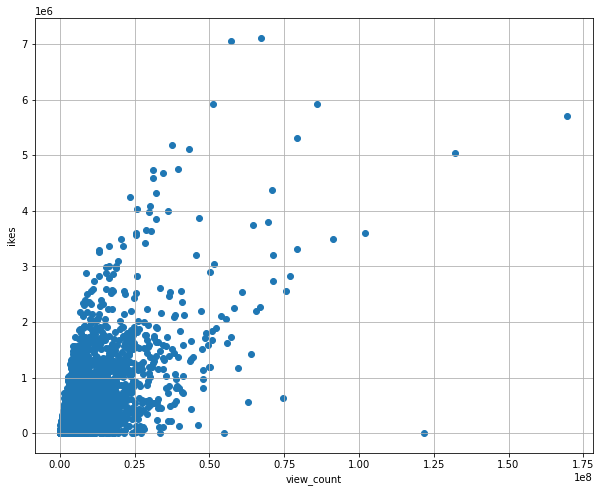

In [54]:
plt.figure(figsize=(10, 8))
plt.grid()
plt.scatter(youtube['view_count'],youtube['likes'])
plt.xlabel('view_count')
plt.ylabel('ikes')
plt.show()

### 2). views and dislikes 상관관계

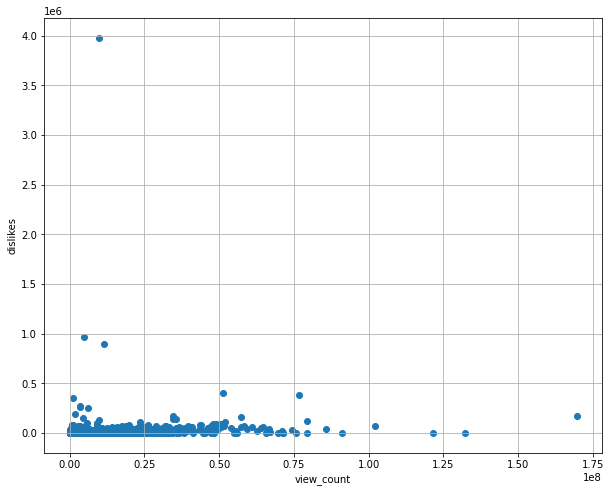

In [55]:
plt.figure(figsize=(10, 8))
plt.grid()
plt.scatter(x = youtube['view_count'],y = youtube['dislikes'])
plt.xlabel('view_count')
plt.ylabel('dislikes')
plt.show()

### 3). likes and dislikes 상관관계

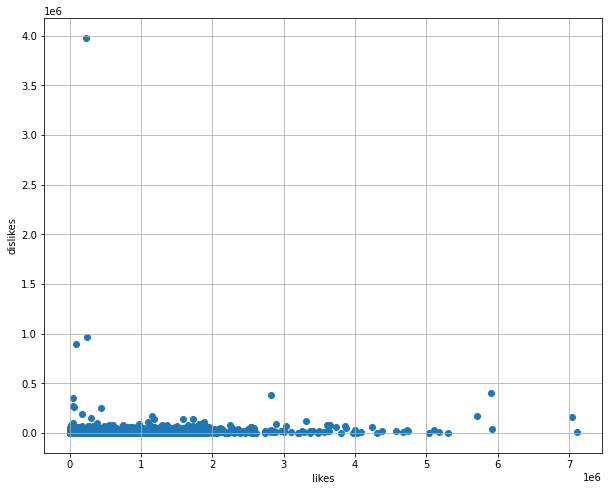

In [56]:
plt.figure(figsize=(10, 8))
plt.grid()
plt.scatter(x = youtube['likes'],y= youtube['dislikes'])
plt.xlabel('likes')
plt.ylabel('dislikes')
plt.show()

### 4). views and comment_count 상관관계

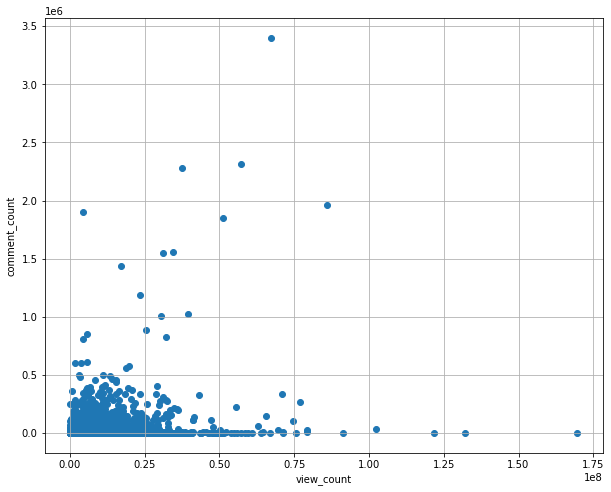

In [57]:
plt.figure(figsize=(10, 8))
plt.grid()
plt.scatter(x= youtube['view_count'],y= youtube['comment_count'])
plt.xlabel('view_count')
plt.ylabel('comment_count')
plt.show()

### 5). likes and comment_count 상관관계

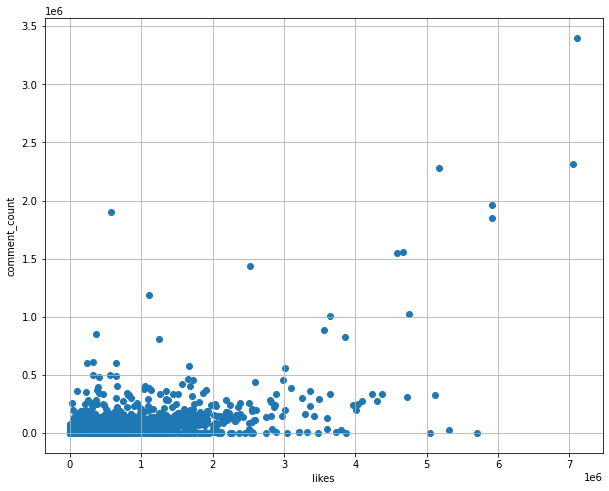

In [58]:
plt.figure(figsize=(10, 8))
plt.grid()
plt.scatter(x = youtube['likes'],y = youtube['comment_count'])
plt.xlabel('likes')
plt.ylabel('comment_count')
plt.show()

### 6). dislikes and comment_count 상관관계

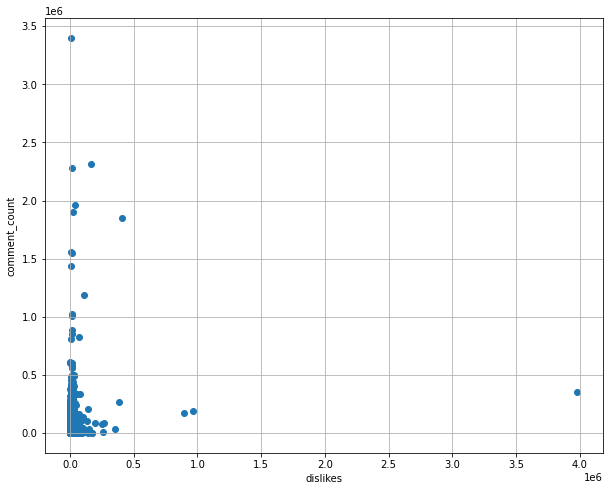

In [59]:
plt.figure(figsize=(10, 8))
plt.grid()
plt.scatter(x = youtube['dislikes'],y = youtube['comment_count'])
plt.xlabel('dislikes')
plt.ylabel('comment_count')
plt.show()

### 6). tag_count and view_count 상관관계

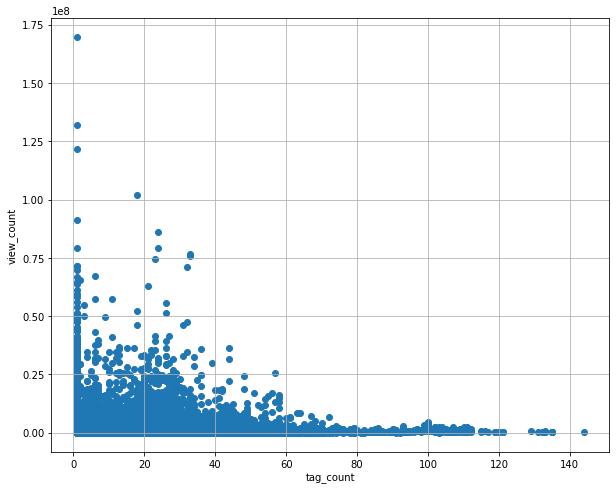

In [84]:

plt.figure(figsize=(10, 8))
plt.grid()
plt.scatter(x = youtube['tag_count'],y = youtube['view_count'])
plt.xlabel('tag_count')
plt.ylabel('view_count')
plt.show()

## 6. Title_length

### 1). title length 와 상관관계

In [60]:
youtube["title_length"] = youtube["title"].apply(lambda x: len(x))
youtube.head(3)

,title,publishedAt,channelId,channelTitle,category,categoryId,trending_date,tags,view_count,likes,...,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,year,contains_capitalized,tag_count,title_length
video_id,,,,,,,,,,,,,,,,,,,,,
s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11 22:21:49,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,People & Blogs,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,...,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vÃ­deo me declarei pra ...",BR,2020,True,14,46
jbGRowa5tIk,ITZY âNot Shyâ M/V TEASER,2020-08-11 15:00:13,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,Music,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|ìì§|ITZY Video|I...,6000070,714310,...,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,BR,2020,True,47,29
3EfkCrXKZNs,Oh Juliana PARÃDIA - MC Niack,2020-08-10 14:59:00,UCoXZmVma073v5G1cW82UKkA,As IrmÃ£s Mota,People & Blogs,22,2020-08-12T00:00:00Z,OH JULIANA PARÃDIA|MC Niack PARÃDIA|PARÃDIA...,2296748,39761,...,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! ð¬ Quer nos mandar...,BR,2020,True,7,30


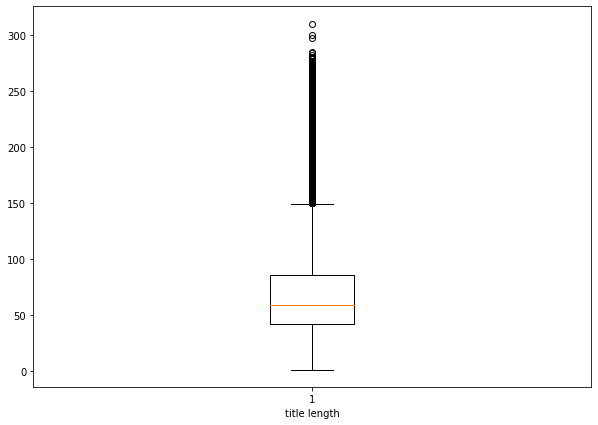

In [61]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(youtube.title_length)
plt.xlabel("title length")
plt.show()

### 2). title lengh에 따른 비디오 수

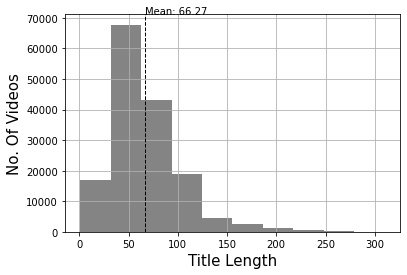

In [62]:
youtube["title_length"]= youtube["title"].apply(lambda x: len(x))

ax=youtube['title_length'].hist(color='#848484')

ax.axvline(youtube['title_length'].mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()

ax.text(youtube['title_length'].mean(), max_ylim, 'Mean: {:.2f}'.format(youtube['title_length'].mean()))

plt.xlabel("Title Length",fontsize=15)
plt.ylabel("No. Of Videos",fontsize=15)
plt.show()

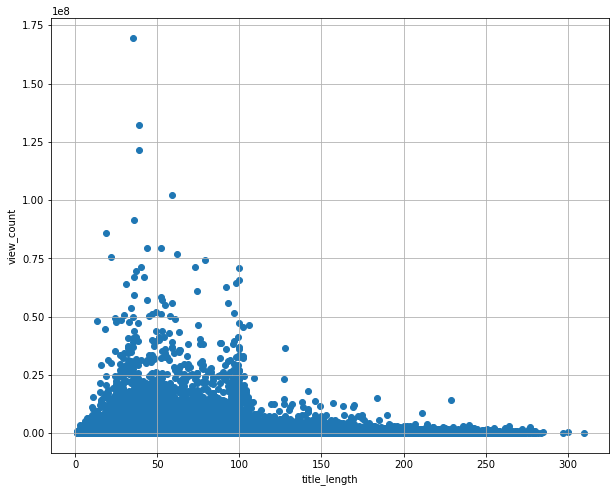

In [88]:

plt.figure(figsize=(10, 8))
plt.grid()
plt.scatter(x = youtube['title_length'],y = youtube['view_count'])
plt.xlabel('title_length')
plt.ylabel('view_count')
plt.show()

### 3). title_length and likes 상관관계

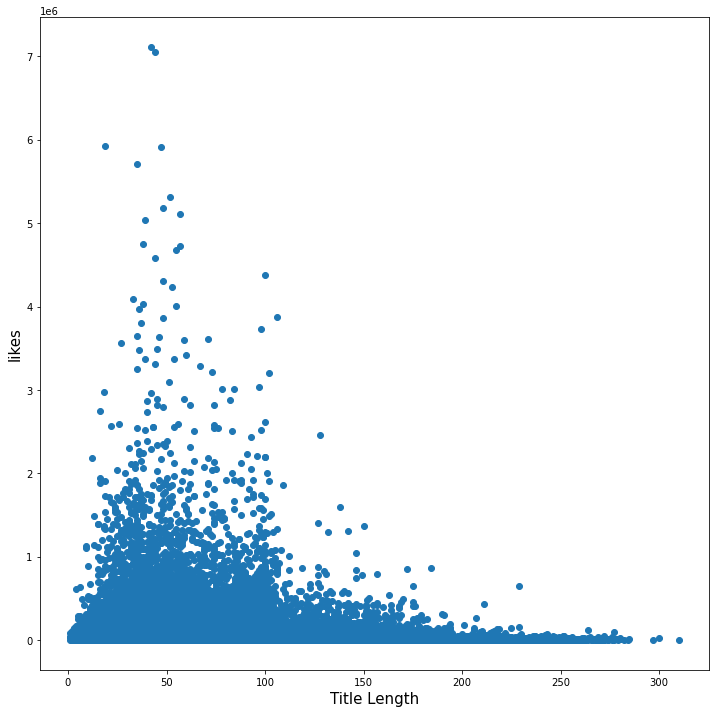

In [63]:
plt.figure(figsize=(12,12))
plt.scatter(youtube['title_length'],youtube['likes'])
plt.xlabel("Title Length",size=15)
plt.ylabel("likes",size=15)
plt.show()

### 4). title_length and views 상관관계

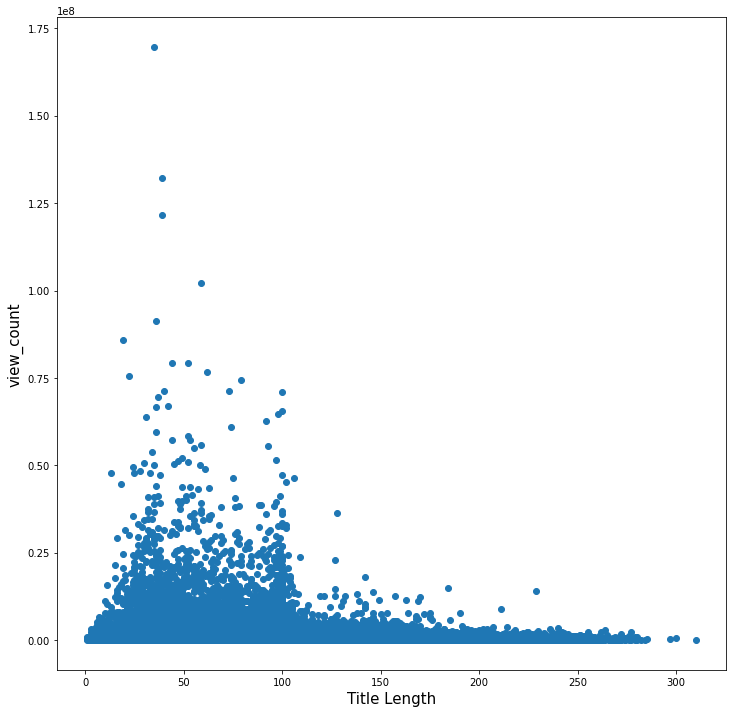

In [64]:
plt.figure(figsize=(12,12))
plt.scatter(youtube['title_length'],youtube['view_count'])
plt.xlabel("Title Length",size=15)
plt.ylabel("view_count",size=15)
plt.show()

### 5). title length and dislikes 상관관계

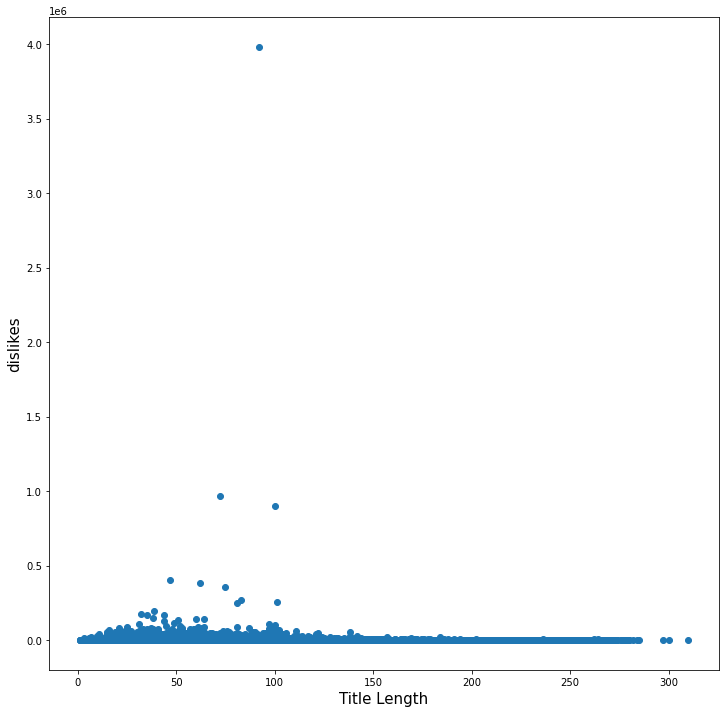

In [65]:
plt.figure(figsize=(12,12))
plt.scatter(youtube['title_length'],youtube['dislikes'])
plt.xlabel("Title Length",size=15)
plt.ylabel("dislikes",size=15)
plt.show()

In [66]:
youtube.head()

,title,publishedAt,channelId,channelTitle,category,categoryId,trending_date,tags,view_count,likes,...,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,year,contains_capitalized,tag_count,title_length
video_id,,,,,,,,,,,,,,,,,,,,,
s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11 22:21:49,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,People & Blogs,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,...,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vÃ­deo me declarei pra ...",BR,2020,True,14,46
jbGRowa5tIk,ITZY âNot Shyâ M/V TEASER,2020-08-11 15:00:13,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,Music,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|ìì§|ITZY Video|I...,6000070,714310,...,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,BR,2020,True,47,29
3EfkCrXKZNs,Oh Juliana PARÃDIA - MC Niack,2020-08-10 14:59:00,UCoXZmVma073v5G1cW82UKkA,As IrmÃ£s Mota,People & Blogs,22,2020-08-12T00:00:00Z,OH JULIANA PARÃDIA|MC Niack PARÃDIA|PARÃDIA...,2296748,39761,...,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! ð¬ Quer nos mandar...,BR,2020,True,7,30
gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11 15:00:09,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,Gaming,20,2020-08-12T00:00:00Z,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,...,2748,https://i.ytimg.com/vi/gBjox7vn3-g/default.jpg,False,False,VocÃª se unirÃ¡ aos Lunari e aos Solari em Tar...,BR,2020,True,42,48
npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11 20:04:02,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,Comedy,23,2020-08-12T00:00:00Z,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,...,2751,https://i.ytimg.com/vi/npoUGx7UW7o/default.jpg,False,False,Danilo Gentili recebe Thammy Miranda. ApÃ³s pa...,BR,2020,False,22,52
